In [1]:
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) You arrive at the train station at 10 o’clock, knowing that the train will arrive at some time **uniformly distributed** between 10 and 10:30. What is the probability that you will have to wait longer than 10 minutes?

In [2]:
1 - stats.uniform(loc=0, scale=30).cdf(10)

0.6666666666666667

2) What is the probability you will have to wait less than 10 minutes?

In [3]:
stats.uniform(loc=0, scale=30).cdf(10)

0.3333333333333333

3) What time is in the 60th percentile of this distribution?

In [4]:
stats.uniform(loc=0, scale=30).ppf(0.6)

18.0

4) What is the probability the train will arrive between 10:10 and 10:20?

In [5]:
stats.uniform(loc=0, scale=30).cdf(20) - stats.uniform(loc=0, scale=30).cdf(10)

0.3333333333333333

5) Now say the arrival of trains **follows a Poisson process** where a train arrives once every half-hour. What is the probability that you will have to wait longer than 10 minutes?

In [6]:
1 - stats.expon(scale=30).cdf(10)

0.7165313105737893

6) Knowing that it follows a Poisson process, if at 10:15 the train has not arrived, what is the probability that you will have to wait at least an additional 10 minutes?

In [7]:
#No Difference
1 - stats.expon(scale=30).cdf(10)

0.7165313105737893

7) At what time does the train have the highest chance of arriving? Create the appropriate graph that corresponds with this belief.

In [8]:
dist = stats.expon(scale=30)
df = pd.DataFrame()
df['value'] = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
df['PDF'] = dist.pdf(df['value'])
df['CDF'] = dist.cdf(df['value'])
df[df['PDF'] == df['PDF'].max()]

,value,PDF,CDF
0,0.30151,0.033,0.01


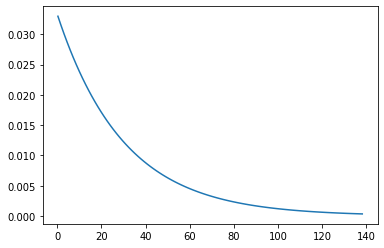

In [9]:
plt.plot(df['value'], df['PDF'])

Because this is an exponential distribution, the highest PDF value is at the lower end of the distribution, which in this case is 0.3 minutes (after 10, 10:15, whenever the distribution starts, it makes no difference).

8) Say the results for the midterm for this class have an average of 70 and a standard deviation of 10 (SCARY). What is the probability that a given student has scored over a 90 on the test? How many standard deviations away from the mean is this score?

In [10]:
1 - stats.norm(loc=70, scale=10).cdf(90)

0.02275013194817921

Since the standard deviation is 10, the score is 2 standard deviations higher than the mean.

9) What is the probability that a given student has scored below a 65 on the test?

In [11]:
stats.norm(loc=70, scale=10).cdf(65)

0.3085375387259869

10) What is the probability that a given student has scored between a 75 and an 85 on the test?

In [12]:
stats.norm(loc=70, scale=10).cdf(85) - stats.norm(loc=70, scale=10).cdf(75)

0.2417303374571288

11) What is the score that is most likely to occur? Create the appropriate graph that corresponds with this belief.

In [13]:
dist = stats.norm(loc=70, scale=10)
df = pd.DataFrame()
df['value'] = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
df['PDF'] = dist.pdf(df['value'])
df['CDF'] = dist.cdf(df['value'])
df[df['PDF'] == df['PDF'].max()]

,value,PDF,CDF
49,69.765015,0.039883,0.490626
50,70.234985,0.039883,0.509374


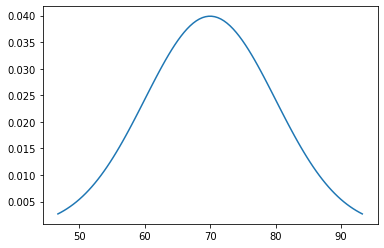

In [14]:
plt.plot(df['value'], df['PDF'])

The PDF graph follows a bell curve, where the highest relative PDF is at the mean of 70.

12) What score is in the 72nd percentile?

In [15]:
stats.norm(loc=70, scale=10).ppf(0.72)

75.82841507271216